In [1]:
# import necessary libraries
import re, string, unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score

from langdetect import detect


SEED=42

/var/folders/hv/xq_dj8v97_j03qt43slpb1q80000gn/T/ipykernel_24715/1205421785.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# cargar los datos
df_original = pd.read_csv('data/tipo1_entrenamiento_estudiantes.csv')

# Entendimiento

In [4]:
df_original.shape

(7875, 2)

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


In [6]:

df_original.sample(5)

,Review,Class
2656,"Consultando Tripadvisor quise visitar este lugar por estar en el primer lugar del ranking, pero realmente me pareció una más entre tantas paladares de La Habana. Mucho mejor que los restaurantes estatales, con dependientes que se esfuerzan en dar una buena atención, pero la comida,...Más",3
7349,"Universidad de La Habana fue previamente un pontificia Universidad católica antes convirtiéndolo en un instituto secular. La arquitectura de esta universidad conserva la forma clásica de la arquitectura romana por todas partes con una pista en el centro.Las magníficas escaleras siempre es un buen lugar para tomar fotos para muchos turistas. La Facultad de Derecho en el derecho y la Facultad de matemáticas de la izquierda dominan el campus principal. La biblioteca está en el centro pero relativamente pequeño. Química y la educación en la parte de atrás son tan-tan.Después de todo, es una pequeña ciudad universitaria y vale la pena explorar su belleza",4
40,"Nuestra visita a El Parian era disappointng debido a las artesanías baja calidad que se ofrecen. La variedad es grande aunque: textil, cerámica, cuero, etc. , pero en el segmento de bajo precio y calidad.",3
2243,Muy entretenida la ciudad amurallada para pasar un buen tiempo paseando y visitando las tiendas. Con cada recorrido se descubre algo nuevo.,5
744,"Fui con mi pareja la noche del 8/2 y ha sido la peor decisión de nuestra vida.\n\nLa visita a este restaurante nos tuvo 2 días en una habitación de hotel con fuertes vómitos y diarrea.\n\nCreemos que ha sido el mal estado del atún...ya que los platos que tenían atún venían muy muy fríos de temperatura, dando a entender que estaban refrigerados ya emplatados y listos para servir. Seguro llevaban muchos días ya que no había muchos clientes, a penas 2 mesas en toda la terraza.\n\nCuiden el estado de su producto y dejen de fastidiar las vacaciones a sus clientes.\n\nLes hemos escrito por instagram sin respuesta por su parte.Más",1


In [7]:
df_stats = df_original.copy()
df_stats['Word_Count'] = df_stats['Review'].apply(lambda x: len(x.split()))
df_stats

,Review,Class,Word_Count
0,"Nos alojamos en una casa alquilada en la ciudad amurallada. Parecía tan segura como cualquier otra gran ciudad con un montón de buenos restaurantes, tiendas y vida nocturna. Gran lugar para un grupo con intereses variados, no estoy seguro de que le traiga a los niños aquí sólo porque no hay mucho que hacer para ellos. Asegúrate de aventurarse fuera de la ciudad, pero algunos también es un gran lugar para alojarse",4,72
1,"La comida está bien, pero nada especial. Yo tenía mejor comida Mexcan en los Estados Unidos. Las margaritas eran geniales. El Mahi Mahi pescado recocido y seco. La carne fajitas aceptable y el coco camarones sabroso. El tortilla chips aperitivo fue decepcionante.",3,42
2,"En mi opinión, no es una como muchos usuarios reclaman. Es un gran paladar que parece ser una parada con muchos grupos de excursión. El menú es más interesante que los otros restaurantes comimos en. La parte más interesante de la experiencia es que el...edificio está en una sección de La Habana Centro. Las plantas inferiores están muy deteriorados, y tienen apartamentos donde viven muchos trabajadores de restaurante. Los pisos superiores, donde el restaurante es, han sido restauradas a gloria pasada. Las reservas son imprescindibles. Plan de 40 a 50 CUC por persona para una comida con cócteles y vinos.Más",3,100
3,"esta curiosa forma que asemeja una silla de montar de ahi su nombre es el icono de la ciudad, vale mucho la pena si no puedes ubir lo puedes asdnirr de cualquier punto de la ciudad",4,36
4,Lo mejor era la limonada. Me gusto la comida de todo el mundo y era sosa y un poco frío.,2,20
...,...,...,...
7870,"El motivo de mi estancia fue porque vine a un congreso medico, y me hospedaron en este lugar, las instalaciones están bien sin ser excelentes, la habitación bien pero tardaban casi todo el día en llegar a hacer el aseo y arreglar el cuarto, la verdad siempre quedaba un poco sucio, la regadera tenía tapado el desagüe por lo que se hacía una alberca, los alimentos buenos (rescatable el pan que acompañan con café) Lo que si es muy bueno es la gente que trabaja en el hotel, son súper amables y serviciales. Este hotel es una buena opción para su estancia además que está a 3 cuadras de paseo Montejo. Saludos desde acá 😀",3,115
7871,"Es difícil revisar el castillo porque apenas podíamos caminar por el sofocante calor, pero no creo que puedas apreciar completamente este lugar a menos que tenía un guía o eran un historiador. De lo contrario, es un gran montículo de cemento con algunos espeluznante, oscuros túneles dentro. Nada es realmente marcados o explicó excepto por una pequeña tienda de regalos y una sala de información que incluye un extraño, uniforme de viejo y sucio, montada en un soldado Mannequen sin cabeza, así que puedes llevar tu imagen. fuimos porque no hay mucho más que hacer, pero definitivamente no es la vida cambia.",3,102
7872,"Si vas a Mérida no puedes perderte de este lugar y que tiene una nueva sucursal más amplia y con la misma calidad, excelente servicio y comida deliciosa y bien servida.",5,31
7873,"Este imperdible sitio, que lleva el nombre del conquistador, es una joya urbana.Su amplitud para el tráfico local motorizado evita congestionamietos, a ambos lados una amplia zona para corredores o simples caminadores llena de pequeños cafés, restaurantes y bares para todos los gustos. Me impresionó la limpieza, la tranquilidad que en nuestros días es un privilegio y AUSENCIA DE GRAFITI. qUE HERMOSURA ES IMPERDIBLE.",5,64


In [8]:
word_count_stats = df_stats['Word_Count'].describe()
word_count_stats

count    7875.000000
mean       70.889778
std        76.289629
min         6.000000
25%        34.000000
50%        45.000000
75%        87.000000
max      2495.000000
Name: Word_Count, dtype: float64

In [9]:
df_original.isnull().sum()

Review    0
Class     0
dtype: int64

No hay registros nulos, los datos son completos.

<Axes: xlabel='Class'>

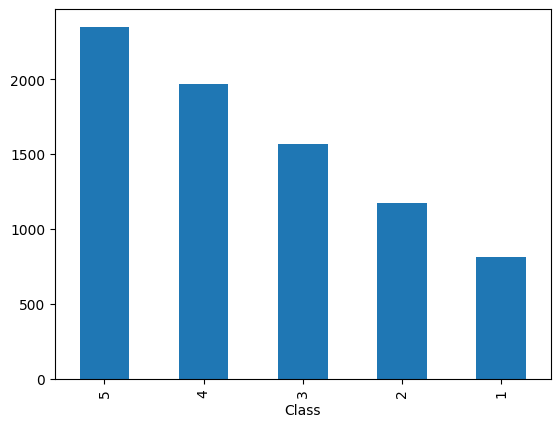

In [10]:
# distribución de variable objetivo
df_original['Class'].value_counts().plot(kind='bar')

Todos los valores de la columna 'Class' son válidos.

In [11]:
df_original.duplicated().sum()

71

Hay 71 registro duplicados, estos se deben eliminar del dataset.

In [12]:
duplicated_rows = df_original[df_original.duplicated()]
duplicated_rows


,Review,Class
518,"La ubicación es muy buena, al igual que la vista, la playa contrario a lo que esperaba resultó que estaba bastante limpia.\nSe percibe el sabor y la frescura en los insumos de los alimentos , lo cual es parte de la experiencia que ofrece...el lugar ya que tienen sus propias granjas productoras. La carta es limitada ( lo cual en mi caso prefiero, ya que se nota el esmero en cada uno de los platos que preparan), los precios están por arriba del promedio de otros restaurantes cercanos pero no llegan a ser exagerados, desconozco si eso se debió a que solo se tenía un salón disponible, ya que en la fecha que lo visité, el resto del restaurante se encontraba en remodelación (es la único razón por lo cual no otorgo la evaluación más alta), mi sugerencia sería que siguieran manteniendo los precios ya que los hace muy competitivos … sin duda regresaría, es un lugar que debes visitar en Veracruz sobre todo si eres fanático del buen comer…Más",4
1112,"El lugar es una maravilla que merece ser visitado. El servicio de cobro es pésimo y no es por el dinero porque mucha gente entra gratis, se hacen filas de más de 1 hora para pasar a pleno sol y mucha gente se mete disque al baño y no hace fila. Esta muy desorganizado.",2
1605,"Cierran a las 3 pm, cobraron $85 adultos y niños (por lo menos los de 2 años) y adulto mayor gratis. A la entrada hay guías. Se juntan grupos de mínimo 10 personas y te cobran $70 por persona o $700 a quien se los pague. Excelente explicación y atención de parte de ellos. Poca claridad de información en redes, y el número telefónico no sirve. Llegamos fácilmente con waze. Lleven buen bloqueador, sombrero y de preferencia tenis.",3
1843,"Acudimos un sábado 2 de julio a las 11:15 de la mañana. Estuvimos esperando más de media hora nosotros dos y otro grupo de cuatro personas fuera, porque la camarera estaba dentro. Nos vio como estábamos esperando y no fue capaz de salir a atendernos...o dar alguna explicación si el bar estaba abierto o cerrado.\n\nNos tuvimos que marcharMás",1
1851,"El lugar es una maravilla que merece ser visitado. El servicio de cobro es pésimo y no es por el dinero porque mucha gente entra gratis, se hacen filas de más de 1 hora para pasar a pleno sol y mucha gente se mete disque al baño y no hace fila. Esta muy desorganizado.",2
...,...,...
7520,"Un lugar muy limpio ordenado hermoso con áreas amplias que vale la pena disfrutar en familia un momento, primera vez que lo visito pero vale la pena acudir.",3
7601,"El lugar es una maravilla que merece ser visitado. El servicio de cobro es pésimo y no es por el dinero porque mucha gente entra gratis, se hacen filas de más de 1 hora para pasar a pleno sol y mucha gente se mete disque al baño y no hace fila. Esta muy desorganizado.",2
7756,Deben de actualizar los horarios en las diferentes páginas ya que como yo o cualquiera de los visitantes que vamos podemos llegar y encontrar cerrado y luego la página para buscar información no funciona.,3
7794,"Wow Había escuchado muchas recomendaciones de este lugar, pero nunca había ido, hace unos fui y me precio muy interesante toda las historias que hay en este museo.",5


# Procesamiento y Preparación

In [13]:
# eliminar las filas duplicadas
df_prep = df_original.drop_duplicates()

In [14]:
df_prep.shape

(7804, 2)

In [15]:
# TODO: balancear las clases (variable objetivo)

In [16]:
# elimnar filas con texto en otros idiomas
def detect_language(text):
    try:
        language = detect(text)
        return language == 'es'  # Check if language is Spanish
    except:
        return False

In [17]:
df_prep = df_prep[df_prep['Review'].apply(detect_language)]

In [18]:
df_prep.shape

(7797, 2)

In [19]:
# TODO: guardar datos despues de transformaciones de limpieza
# df_prep.to_csv('data/tipo1_entrenamiento_estudiantes_prep.csv', index=False)

## Divisón en entrenamiento y prueba 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_prep["Review"], df_prep["Class"], test_size = 0.3, stratify = df_prep["Class"], random_state = SEED)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5457,), (2340,), (5457,), (2340,))

## Tokenización / Vectorización

"Feature engineering"

* Bag of Words / Count Tokenizer
* Tf-IDF

In [22]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/mci/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
stop_words = set(stopwords.words('spanish'))

In [24]:
def tokenize_text(text):
    # convertir a minúsculas
    text = text.lower()
    
    # eliminar caracteres numericos
    text = re.sub(r'\d+', '', text) 

    # eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # eliminar caracters especiales
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons TODO: not all emojis included here
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               "]+", flags=re.UNICODE)
    
    text = emoji_pattern.sub(r'', text)

    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')  
     
    tokens = word_tokenize(text)

    # eliminar los stems de las palabras
    stemmer = SnowballStemmer('spanish')
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

In [25]:
bow_vectorizer = CountVectorizer(stop_words=list(stop_words), tokenizer=tokenize_text)
tfidf_vectorizer = TfidfVectorizer( stop_words=list(stop_words), tokenizer=tokenize_text)

In [26]:
X_train_bow = bow_vectorizer.fit_transform(X_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estareis', 'estari', 'estariais', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habeis', 'habi', 'habiais', 'habr', 'habreis', 'habri', 'habriais', 'hast', 'hayais', 'hem', 'hub', 'hubier', 'hubies', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'sereis', 'seri', 'seriais', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'ta

In [27]:
len(bow_vectorizer.vocabulary_)

12445

In [28]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [29]:
len(tfidf_vectorizer.vocabulary_)

12445

In [30]:
df_bow_sklearn = pd.DataFrame(X_train_bow.toarray(),columns=bow_vectorizer.get_feature_names_out())
df_bow_sklearn

,...,......,8,aa,aaaaa,ab,abad,abaj,abajol,abalanz,...,zonassi,zoo,zoolog,zorr,zotan,zuegly,zul,zum,zumb,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_tfid_sklearn = pd.DataFrame(X_train_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
df_tfid_sklearn

,...,......,8,aa,aaaaa,ab,abad,abaj,abajol,abalanz,...,zonassi,zoo,zoolog,zorr,zotan,zuegly,zul,zum,zumb,zur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eliminación de palabras con baja frecuencia

In [32]:
# Obtener el vocabulario
vocabulario = bow_vectorizer.vocabulary_

# Obtener la suma de las frecuencias de cada palabra en todo el conjunto de datos
frecuencia_total = X_train_bow.sum(axis=0)
# Crear un diccionario que mapea cada palabra a su frecuencia total
frecuencias = {palabra: frecuencia_total[0, indice] for palabra, indice in vocabulario.items()}

# Convertir el diccionario de frecuencias en un DataFrame
df_frecuencias = pd.DataFrame(list(frecuencias.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia de forma descendente
df_frecuencias = df_frecuencias.sort_values(by='Frecuencia', ascending=False)
# Imprimir las frecuencias de cada palabra
df_frecuencias

,Palabra,Frecuencia
21,par,4460
90,com,3606
95,hotel,2799
167,per,2746
5,buen,2478
...,...,...
7116,crat,1
7115,piensom,1
7114,motulen,1
7113,paridadveurocuc,1


In [33]:
df_palabras_altafrec = df_frecuencias[df_frecuencias['Frecuencia'] > 50]
df_palabras_altafrec.describe()

,Frecuencia
count,722.000000
mean,228.997230
std,357.759273
min,51.000000
25%,73.000000
50%,119.000000
75%,255.000000
max,4460.000000


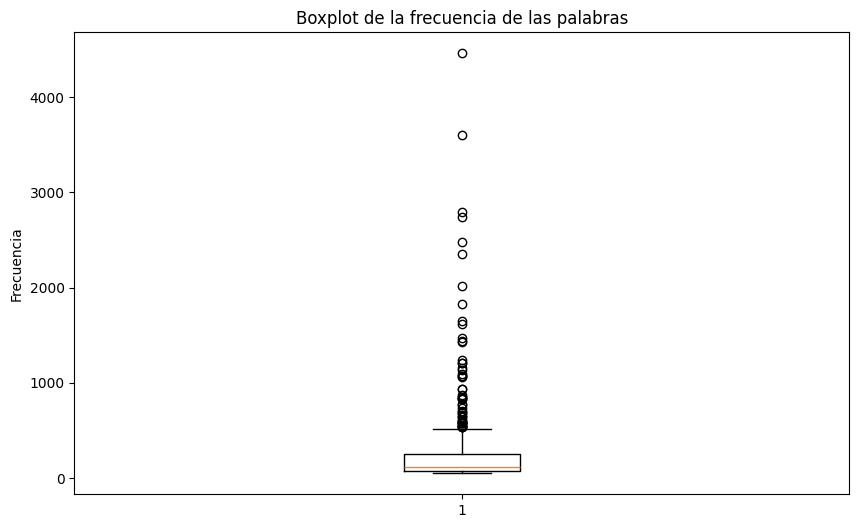

In [34]:
# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_palabras_altafrec['Frecuencia'])
plt.title('Boxplot de la frecuencia de las palabras')
plt.ylabel('Frecuencia')
plt.show()

In [35]:
# Obtener las palabras de alta frecuencia como una lista
palabras_altafrecuencia = df_palabras_altafrec['Palabra'].tolist()

# Filtrar las columnas que coinciden con las palabras de alta frecuencia
df_bow_sklearn_filtrado = df_bow_sklearn[palabras_altafrecuencia]

len(df_bow_sklearn_filtrado.columns)

722

In [36]:
# Convertir el DataFrame de nuevo a un array de NumPy
X_train_bow_filtered = df_bow_sklearn_filtrado.to_numpy()
X_train_bow_filtered.shape

(5457, 722)

# Entrenamiento y evaluación de modelos

## [nombre algoritmo]

Desarrollado por:

[descripción]

### Conclusiones

## Naive Bayes

Desarrollado por: Maria Castro Iregui

[descripción]

In [37]:
from datetime import datetime
current_time = datetime.now().strftime("%H:%M:%S")
print("Current time:", current_time)


Current time: 18:24:21


### Entrenamiento sin filtro de palabras

In [38]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_bow, y_train)


MultinomialNB()

In [39]:
df_feature_importance = pd.DataFrame(naive_bayes.feature_log_prob_.transpose(), index=bow_vectorizer.get_feature_names_out(), columns=naive_bayes.classes_)
df_feature_importance = df_feature_importance.apply(lambda x: np.exp(x), axis=0)

In [40]:
df_feature_importance[1].sort_values(ascending=False).head(20)

par        0.012370
hotel      0.011271
com        0.010811
habit      0.009175
per        0.007412
tod        0.007003
mal        0.005929
estab      0.005801
mas        0.005699
si         0.005214
habi       0.004754
servici    0.004217
lleg       0.004064
nuestr     0.003834
hac        0.003834
tien       0.003782
sol        0.003655
noch       0.003655
lug        0.003501
much       0.003425
Name: 1, dtype: float64

In [41]:
df_feature_importance[2].sort_values(ascending=False).head(20)

par        0.015422
hotel      0.012231
com        0.012004
per        0.011605
habit      0.010788
tod        0.007084
mas        0.007008
buen       0.006382
estab      0.006211
much       0.005812
mal        0.005641
si         0.005641
servici    0.005014
tien       0.004824
sol        0.004520
lug        0.004311
nuestr     0.004046
hac        0.004008
mejor      0.003989
lleg       0.003970
Name: 2, dtype: float64

In [42]:
df_feature_importance[3].sort_values(ascending=False).head(20)

par        0.016505
per        0.014038
com        0.013177
hotel      0.011200
buen       0.009545
habit      0.007923
mas        0.007822
tod        0.007281
si         0.007281
much       0.005592
tien       0.005507
lug        0.005490
estab      0.005051
bien       0.004831
mejor      0.004595
servici    0.004595
poc        0.004477
sol        0.004325
restaur    0.004105
hac        0.004054
Name: 3, dtype: float64

In [43]:
df_feature_importance[4].sort_values(ascending=False).head(20)

par        0.017820
buen       0.013210
com        0.013004
per        0.010027
hotel      0.009314
tod        0.008284
lug        0.007366
tien       0.006383
mas        0.006225
si         0.005987
habit      0.005924
bien       0.005813
pued       0.005671
much       0.005386
visit      0.005005
servici    0.004752
restaur    0.004514
ciud       0.004182
vist       0.004182
poc        0.004039
Name: 4, dtype: float64

In [44]:
df_feature_importance[5].sort_values(ascending=False).head(20)

par         0.016494
com         0.014763
tod         0.011764
buen        0.009538
excelent    0.008440
lug         0.007698
hotel       0.007235
servici     0.006864
per         0.005967
mas         0.005905
restaur     0.005642
much        0.005596
visit       0.005503
pued        0.005349
mejor       0.004900
si          0.004838
tien        0.004622
bien        0.004390
nuestr      0.004328
ciud        0.004236
Name: 5, dtype: float64

In [45]:
y_train_naive_predict = naive_bayes.predict(X_train_bow)
y_test_naive_predict = naive_bayes.predict(bow_vectorizer.transform(X_test))

In [46]:
print('Clases', len(naive_bayes.classes_))
print('Etiquetas:', naive_bayes.classes_)
print('Features:', len(naive_bayes.feature_log_prob_[0]))
print('Features relevantes', np.count_nonzero(naive_bayes.feature_log_prob_))
print('Prior probabilities:', naive_bayes.class_log_prior_)
print('Feature log probabilities:', naive_bayes.feature_log_prob_)

Clases 5
Etiquetas: [1 2 3 4 5]
Features: 12445
Features relevantes 62225
Prior probabilities: [-2.29291966 -1.90515413 -1.6153192  -1.37990106 -1.20464495]
Feature log probabilities: [[ -6.12024631 -10.5745936  -10.5745936  ...  -9.18829924 -10.5745936
  -10.5745936 ]
 [ -6.19861168 -10.87144051 -10.87144051 ...  -8.79199897  -9.77282822
  -10.87144051]
 [ -6.31576352 -10.29544518 -10.98859236 ...  -9.37915445 -10.98859236
  -10.98859236]
 [ -6.86332831 -11.05298305 -11.05298305 ...  -9.44354514 -11.05298305
  -11.05298305]
 [ -7.27069942  -9.97874962 -10.38421473 ...  -9.69106755 -10.38421473
  -10.38421473]]


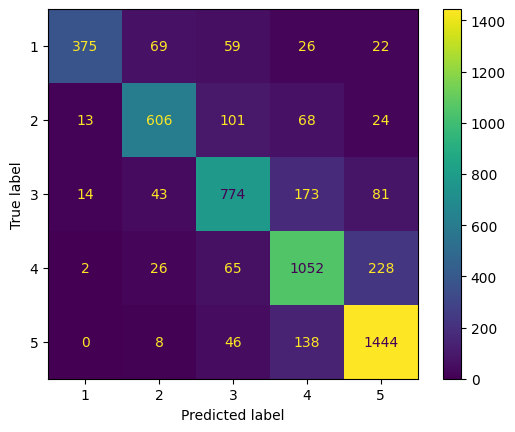

In [47]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_naive_predict)

In [48]:
print("accuracy:", naive_bayes.score(bow_vectorizer.transform(X_train), y_train))
print("precision:", precision_score(y_train, y_train_naive_predict, average='macro'))
print("recall:", recall_score(y_train, y_train_naive_predict, average='macro'))
print("f1:", f1_score(y_train, y_train_naive_predict, average='macro'))

accuracy: 0.7789994502473887
precision: 0.7998876925531329
recall: 0.7578192425447908
f1: 0.7742513501086685


In [67]:
report = classification_report(y_train, y_train_naive_predict)
print(report)

              precision    recall  f1-score   support

           1       0.93      0.68      0.79       551
           2       0.81      0.75      0.77       812
           3       0.74      0.71      0.73      1085
           4       0.72      0.77      0.74      1373
           5       0.80      0.88      0.84      1636

    accuracy                           0.78      5457
   macro avg       0.80      0.76      0.77      5457
weighted avg       0.78      0.78      0.78      5457



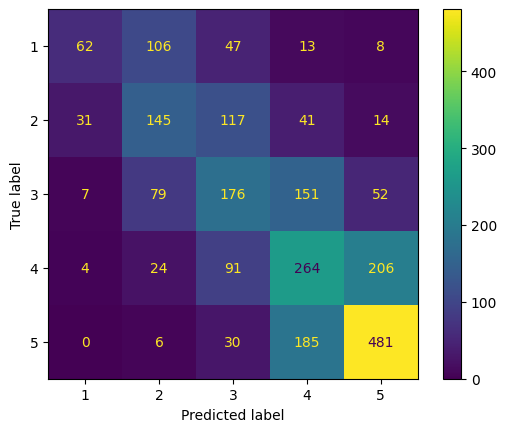

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_naive_predict)

In [50]:
print("accuracy:", naive_bayes.score(tfidf_vectorizer.transform(X_test), y_test))
print("precision:", precision_score(y_test, y_test_naive_predict, average='macro'))
print("recall:", recall_score(y_test, y_test_naive_predict, average='macro'))
print("f1:", f1_score(y_test, y_test_naive_predict, average='macro'))

accuracy: 0.4623931623931624
precision: 0.48328863309384423
recall: 0.43825513148036244
f1: 0.4473543452328352


In [68]:
report = classification_report(y_test, y_test_naive_predict)
print(report)

              precision    recall  f1-score   support

           1       0.60      0.26      0.36       236
           2       0.40      0.42      0.41       348
           3       0.38      0.38      0.38       465
           4       0.40      0.45      0.42       589
           5       0.63      0.69      0.66       702

    accuracy                           0.48      2340
   macro avg       0.48      0.44      0.45      2340
weighted avg       0.49      0.48      0.48      2340



### Entrenamiento con filtro de palabras

In [51]:
naive_bayes_filtered = MultinomialNB()
naive_bayes_filtered.fit(X_train_bow_filtered, y_train)

MultinomialNB()

In [52]:
df_feature_importance_filtered= pd.DataFrame(naive_bayes_filtered.feature_log_prob_.transpose(), index=df_palabras_altafrec['Palabra'], columns=naive_bayes_filtered.classes_)
df_feature_importance_filtered = df_feature_importance_filtered.apply(lambda x: np.exp(x), axis=0)

In [53]:
df_feature_importance_filtered[1].sort_values(ascending=False).head(20)

Palabra
par        0.023564
hotel      0.021470
com        0.020594
habit      0.017478
per        0.014119
tod        0.013340
mal        0.011295
estab      0.011052
mas        0.010857
si         0.009932
habi       0.009056
servici    0.008033
lleg       0.007741
hac        0.007303
nuestr     0.007303
tien       0.007205
sol        0.006962
noch       0.006962
lug        0.006670
much       0.006524
Name: 1, dtype: float64

In [54]:
df_feature_importance_filtered[2].sort_values(ascending=False).head(20)

Palabra
par        0.025774
hotel      0.020441
com        0.020060
per        0.019394
habit      0.018029
tod        0.011839
mas        0.011712
buen       0.010665
estab      0.010379
much       0.009713
mal        0.009427
si         0.009427
servici    0.008380
tien       0.008062
sol        0.007554
lug        0.007205
nuestr     0.006761
hac        0.006697
mejor      0.006666
lleg       0.006634
Name: 2, dtype: float64

In [55]:
df_feature_importance_filtered[3].sort_values(ascending=False).head(20)

Palabra
par        0.026467
per        0.022512
com        0.021130
hotel      0.017961
buen       0.015306
habit      0.012705
mas        0.012543
tod        0.011676
si         0.011676
much       0.008967
tien       0.008831
lug        0.008804
estab      0.008100
bien       0.007748
servici    0.007368
mejor      0.007368
poc        0.007179
sol        0.006935
restaur    0.006583
hac        0.006502
Name: 3, dtype: float64

In [56]:
df_feature_importance_filtered[4].sort_values(ascending=False).head(20)

Palabra
par        0.028112
buen       0.020840
com        0.020515
per        0.015817
hotel      0.014693
tod        0.013069
lug        0.011619
tien       0.010070
mas        0.009820
si         0.009446
habit      0.009346
bien       0.009171
pued       0.008946
much       0.008496
visit      0.007896
servici    0.007496
restaur    0.007122
ciud       0.006597
vist       0.006597
poc        0.006372
Name: 4, dtype: float64

In [57]:
df_feature_importance_filtered[5].sort_values(ascending=False).head(20)

Palabra
par         0.026696
com         0.023894
tod         0.019040
buen        0.015437
excelent    0.013661
lug         0.012460
hotel       0.011709
servici     0.011109
per         0.009658
mas         0.009558
restaur     0.009132
much        0.009057
visit       0.008907
pued        0.008657
mejor       0.007931
si          0.007831
tien        0.007481
bien        0.007106
nuestr      0.007006
ciud        0.006855
Name: 5, dtype: float64

In [58]:
#  la eliminacion frecuencias bajas en text

# X_test as df
X_test_bow = bow_vectorizer.transform(X_test)
df_X_test_bow = pd.DataFrame(X_test_bow.toarray(),columns=bow_vectorizer.get_feature_names_out())

df_X_test_bow_filtrado = df_X_test_bow[palabras_altafrecuencia]
X_test_bow_filtrado = df_X_test_bow_filtrado.to_numpy()

# Filtrar las columnas que coinciden con las palabras de alta frecuencia

y_test_naive_filtr_predict = naive_bayes_filtered.predict(X_test_bow_filtrado)

y_train_naive_filtr_predict = naive_bayes_filtered.predict(X_train_bow_filtered)

In [59]:
print('Clases', len(naive_bayes_filtered.classes_))
print('Etiquetas:', naive_bayes_filtered.classes_)
print('Features:', len(naive_bayes_filtered.feature_log_prob_[0]))
print('Features relevantes', np.count_nonzero(naive_bayes_filtered.feature_log_prob_))
print('Prior probabilities:', naive_bayes_filtered.class_log_prior_)
print('Feature log probabilities:', naive_bayes_filtered.feature_log_prob_)

Clases 5
Etiquetas: [1 2 3 4 5]
Features: 722
Features relevantes 3610
Prior probabilities: [-2.29291966 -1.90515413 -1.6153192  -1.37990106 -1.20464495]
Feature log probabilities: [[-3.74804458 -3.8827573  -3.84108461 ... -7.53223421 -7.98421933
  -7.29107215]
 [-3.6584012  -3.90901215 -3.89020282 ... -8.16067697 -8.56614207
  -7.41346256]
 [-3.63185951 -3.85705224 -4.01957117 ... -8.03143951 -8.03143951
  -8.57043601]
 [-3.57157131 -3.88658651 -4.22038267 ... -8.11220297 -7.70673786
  -8.19921435]
 [-3.62322816 -3.73412307 -4.44736612 ... -8.11092776 -8.03088506
  -8.9863965 ]]


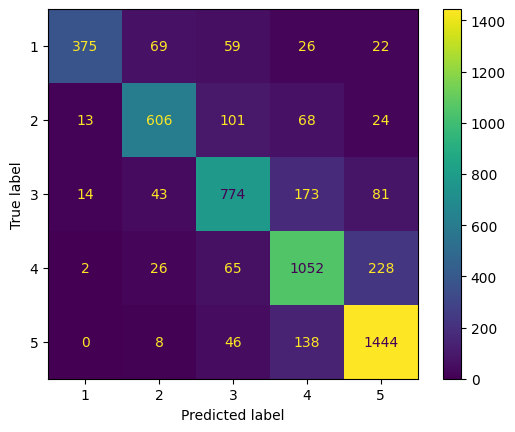

In [60]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_naive_predict)

In [61]:
print("accuracy:", naive_bayes_filtered.score(X_train_bow_filtered, y_train))
print("precision:", precision_score(y_train, y_train_naive_filtr_predict, average='macro'))
print("recall:", recall_score(y_train, y_train_naive_filtr_predict, average='macro'))
print("f1:", f1_score(y_train, y_train_naive_filtr_predict, average='macro'))

accuracy: 0.5666116914055341
precision: 0.5523564332240489
recall: 0.550499468478993
f1: 0.5485795573340392


In [62]:
report = classification_report(y_train, y_train_naive_filtr_predict)
print(report)

              precision    recall  f1-score   support

           1       0.93      0.68      0.79       551
           2       0.81      0.75      0.77       812
           3       0.74      0.71      0.73      1085
           4       0.72      0.77      0.74      1373
           5       0.80      0.88      0.84      1636

    accuracy                           0.78      5457
   macro avg       0.80      0.76      0.77      5457
weighted avg       0.78      0.78      0.78      5457



In [63]:
print("accuracy:", naive_bayes_filtered.score(X_test_bow_filtrado, y_test))
print("precision:", precision_score(y_test, y_test_naive_filtr_predict, average='macro'))
print("recall:", recall_score(y_test, y_test_naive_filtr_predict, average='macro'))
print("f1:", f1_score(y_test, y_test_naive_filtr_predict, average='macro'))

accuracy: 0.47606837606837604
precision: 0.44675438055324246
recall: 0.449316107775393
f1: 0.4462666831604397


In [65]:
report = classification_report(y_test, y_test_naive_filtr_predict)
print(report)

              precision    recall  f1-score   support

           1       0.46      0.48      0.47       236
           2       0.38      0.34      0.36       348
           3       0.38      0.33      0.35       465
           4       0.41      0.38      0.39       589
           5       0.61      0.72      0.66       702

    accuracy                           0.48      2340
   macro avg       0.45      0.45      0.45      2340
weighted avg       0.46      0.48      0.47      2340



### Conclusiones

## [nombre algoritmo]

Desarrollado por:

[descripción]

### Conclusiones

## Selección de final